#### notebooks/task2_eda.ipynb
#### Task 2: Exploratory Data Analysis
#### Description: Comprehensive EDA on enriched dataset. Clear labels for non-technical stakeholders, trajectories 2011–2024, growth rates, data limitations section with links to evidence.
#### Cell 1 (Markdown): Task Overview
"""
#### Task 2: Exploratory Data Analysis
#### Objective
Analyze patterns and factors influencing financial inclusion in Ethiopia using the enriched dataset from Task 1.
This notebook is designed for both technical and non-technical stakeholders:
- Plots have clear titles, labels, and legends.
- Key metrics (e.g., account ownership trajectory, growth rates) are explained in plain language.
- A dedicated **Data Limitations** section highlights gaps and biases with links to supporting evidence.
We focus on:
- Access (account ownership %)
- Usage (digital payment adoption)
- Infrastructure/enablers
- Event impacts
- Correlations
"""

In [2]:
# Cell 2: Setup and Imports
import sys
import os
from pathlib import Path

# Define project root (absolute path for reliability)
project_root = Path(r"C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast")

# Add project root to path
sys.path.insert(0, str(project_root))

from src.data_loader import EthiopiaFIData
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print("Setup complete.")

Setup complete.


In [3]:
# Cell 3: Load Enriched Dataset from data/processed/
enriched_path = project_root / "data" / "processed" / "ethiopia_fi_unified_data_enriched.csv"
ref_path = project_root / "data" / "raw" / "reference_codes.xlsx"

print(f"Loading enriched dataset from: {enriched_path}")

data = EthiopiaFIData(main_path=str(enriched_path), ref_path=str(ref_path))

print("\nEnriched dataset loaded for Task 2!")
print(f"Total rows: {data.df.shape[0]}")
display(data.df.head())

Loading enriched dataset from: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data\processed\ethiopia_fi_unified_data_enriched.csv
Loading main CSV file: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data\processed\ethiopia_fi_unified_data_enriched.csv
Loading reference Excel file: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data\raw\reference_codes.xlsx
Loaded main dataset: 47 rows, 34 columns
Loaded reference codes: (71, 4)

Enriched dataset loaded for Task 2!
Total rows: 47


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Gender disaggregated,NaN


1. Summary by record_type, pillar, source_type:
{'by_record_type': {'observation': 33, 'event': 11, 'target': 3}, 'by_pillar': {'ACCESS': 16, nan: 12, 'USAGE': 11, 'GENDER': 5, 'AFFORDABILITY': 1, 'access': 1, 'usage': 1}, 'by_source_type': {'operator': 15, 'survey': 10, 'regulator': 7, 'research': 4, nan: 4, 'policy': 3, 'calculated': 2, 'news': 2}, 'by_confidence': {'high': 44, 'medium': 3}}

2. Temporal coverage visualization (shows years with data for each indicator):


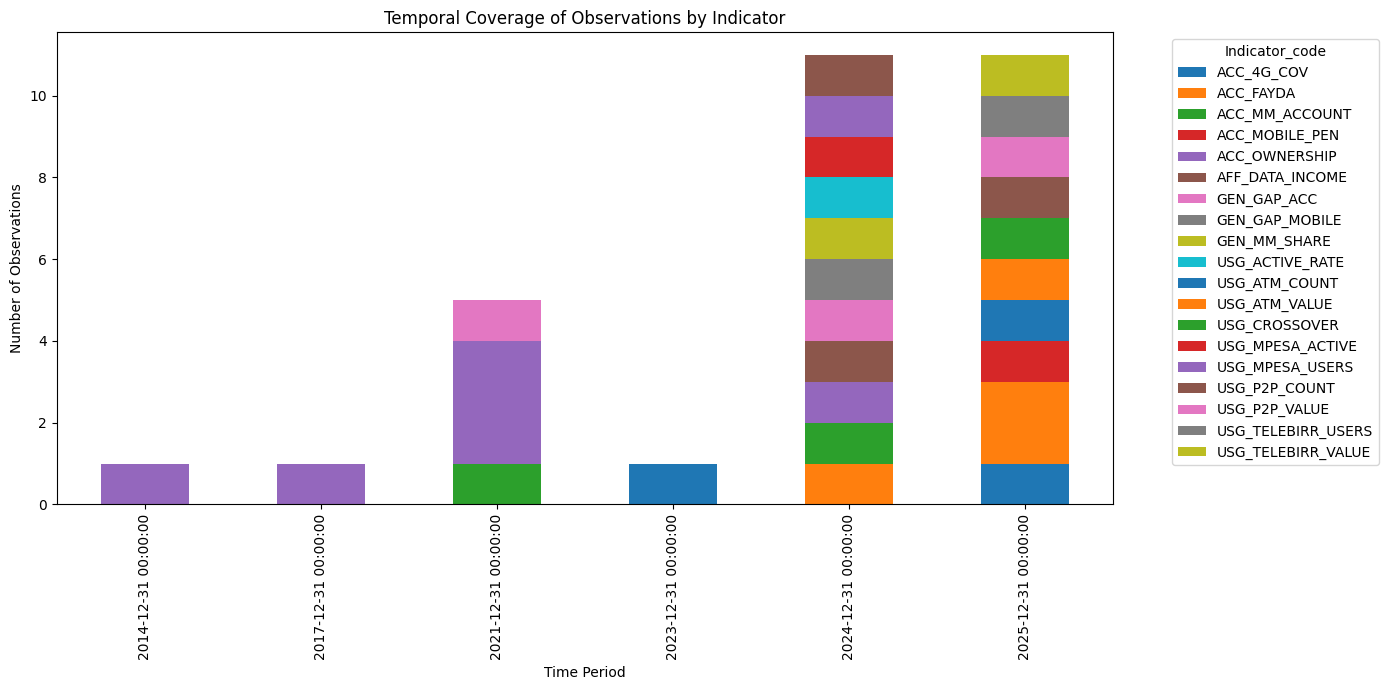


3. Data quality - confidence distribution:


,Count
confidence,
high,44
medium,3



4. Indicator coverage (shows gaps in available metrics):


,indicator_code,count
7,ACC_MOBILE_PEN,1
14,USG_P2P_VALUE,1
13,USG_MPESA_ACTIVE,1
12,USG_MPESA_USERS,1
11,USG_TELEBIRR_VALUE,1
10,USG_TELEBIRR_USERS,1
9,USG_CROSSOVER,1
8,USG_ATM_VALUE,1
15,USG_ATM_COUNT,1
22,EVT_FAYDA,1


In [4]:
# Cell 4: Dataset Overview
print("1. Summary by record_type, pillar, source_type:")
print(data.get_record_counts())

print("\n2. Temporal coverage visualization (shows years with data for each indicator):")
data.plot_temporal_coverage(freq='Y')

print("\n3. Data quality - confidence distribution:")
if 'confidence' in data.df.columns:
    display(data.df['confidence'].value_counts(dropna=False).to_frame('Count'))

print("\n4. Indicator coverage (shows gaps in available metrics):")
display(data.list_unique_indicators().sort_values('count'))

In [10]:
# Cell 5: Access Analysis - Account Ownership Trajectory (2011–2024 Findex Surveys)
# Final version: Integer survey years on x-axis, consistent % units (0–100 scale), data point labels, slowdown highlight, professional styling for report clarity

# Robust Findex ownership filter (percentage values only)
access_obs = data.df[
    (data.df['record_type'] == 'observation') &
    (
        (data.df['pillar'] == 'access') |
        data.df['indicator_code'].str.contains('ACC_OWNERSHIP|OWNERSHIP|ACCOUNT_OWN', case=False, na=False) |
        data.df['indicator'].str.contains('account ownership|financial account', case=False, na=False)
    )
].copy()

if access_obs.empty:
    print("No ownership records found with current filter – check schema and debug below.")
    print("All observation pillars:", data.df[data.df['record_type'] == 'observation']['pillar'].unique())
    print("All observation indicator_codes:", data.df[data.df['record_type'] == 'observation']['indicator_code'].unique())
else:
    # Ensure datetime and extract integer year
    access_obs['observation_date'] = pd.to_datetime(access_obs['observation_date'], errors='coerce')
    access_obs = access_obs.dropna(subset=['observation_date'])  # Drop invalid dates
    access_obs['Survey Year'] = access_obs['observation_date'].dt.year.astype('Int64')

    access_obs = access_obs.sort_values('Survey Year').drop_duplicates('Survey Year').reset_index(drop=True)

    print("Account Ownership Observations (Findex Survey Years):")
    display(access_obs[['Survey Year', 'value_numeric', 'indicator_code']].style.format({'value_numeric': '{:.1f}%'}))

    # Professional trajectory plot
    fig = px.line(access_obs, x='Survey Year', y='value_numeric', markers=True,
                  title='Ethiopia Adult Account Ownership Trajectory<br>(Global Findex Surveys 2011–2024)',
                  labels={'value_numeric': 'Account Ownership (%)', 'Survey Year': 'Survey Year'})

    # Consistent y-axis: 0–100%
    fig.update_yaxes(title='Account Ownership (%)', range=[0, 100], tick0=0, dtick=10, ticksuffix='%')

    # Integer x-axis years
    fig.update_xaxes(title='Survey Year', tickmode='array', tickvals=access_obs['Survey Year'].tolist())

    # Data point labels above points
    for i, row in access_obs.iterrows():
        fig.add_annotation(x=row['Survey Year'], y=row['value_numeric'],
                           text=f"{row['value_numeric']:.1f}%",
                           showarrow=False, yshift=12, font=dict(size=12, color="darkblue"))

    # Highlight slowdown period
    fig.add_vrect(x0=2021, x1=2024, fillcolor="lightcoral", opacity=0.2,
                  annotation_text="+3pp Slowdown Period", annotation_position="top left",
                  annotation_font_color="darkred")

    # Professional styling
    fig.update_layout(
        height=650,
        plot_bgcolor='white',
        xaxis=dict(showgrid=True, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        hovermode='x unified',
        font=dict(size=12)
    )

    fig.show()

    # Growth rates table
    access_obs['Growth (percentage points)'] = access_obs['value_numeric'].diff()
    access_obs['Growth Rate (%)'] = access_obs['value_numeric'].pct_change() * 100

    print("Growth Between Findex Survey Years:")
    growth_table = access_obs[['Survey Year', 'value_numeric', 'Growth (percentage points)', 'Growth Rate (%)']].copy()
    growth_table['value_numeric'] = growth_table['value_numeric'].map('{:.1f}%'.format)
    growth_table['Growth (percentage points)'] = growth_table['Growth (percentage points)'].map(lambda x: f"{x:+.1f}pp" if pd.notna(x) else '-')
    growth_table['Growth Rate (%)'] = growth_table['Growth Rate (%)'].map(lambda x: f"{x:+.1f}%" if pd.notna(x) else '-')
    display(growth_table)

    print("Key Observation for Stakeholders: Strong growth slowed dramatically after 2021 (+3 percentage points 2021–2024), despite rapid mobile money registration.")

Account Ownership Observations (Findex Survey Years):


,Survey Year,value_numeric,indicator_code
0,2014,22.0%,ACC_OWNERSHIP
1,2017,35.0%,ACC_OWNERSHIP
2,2021,46.0%,ACC_OWNERSHIP
3,2024,49.0%,ACC_OWNERSHIP


Growth Between Findex Survey Years:


,Survey Year,value_numeric,Growth (percentage points),Growth Rate (%)
0,2014,22.0%,-,-
1,2017,35.0%,+13.0pp,+59.1%
2,2021,46.0%,+11.0pp,+31.4%
3,2024,49.0%,+3.0pp,+6.5%


Key Observation for Stakeholders: Strong growth slowed dramatically after 2021 (+3 percentage points 2021–2024), despite rapid mobile money registration.


In [5]:
# Cell 6: Usage Analysis - Mobile Money & Digital Payment Trends
# Mobile money account penetration
mm_obs = data.df[
    (data.df['record_type'] == 'observation') &
    data.df['indicator_code'].str.contains('MM_ACCOUNT|DIGITAL_PAYMENT', na=False, case=False)
].copy().sort_values('observation_date')

registered_obs = data.df[
    data.df['indicator_code'].str.contains('REGISTERED|TELEBIRR|MPESA', na=False)
]

print("Mobile money/digital payment observations:")
display(mm_obs[['observation_date', 'indicator', 'value_numeric']])

# Registered vs active gap plot (clear labels)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mm_obs['observation_date'], y=mm_obs['value_numeric'], 
                         mode='lines+markers', name='Digital Payment Usage (%)'))
fig.add_trace(go.Scatter(x=registered_obs['observation_date'], y=registered_obs['value_numeric']/1000000, 
                         mode='lines+markers', name='Registered Mobile Money Users (Millions)', yaxis='y2'))
fig.update_layout(title='Registered vs Active Usage Gap – Explains Slow Findex Progress',
                  yaxis_title='Usage (%)', 
                  yaxis2=dict(title='Registered Users (Millions)', overlaying='y', side='right'),
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()

Mobile money/digital payment observations:


,observation_date,indicator,value_numeric
6,2021-12-31,Mobile Money Account Rate,4.70
7,2024-11-29,Mobile Money Account Rate,9.45


In [9]:
# Cell 7: Infrastructure/Enablers & Events Overlay (Robust with add_shape/annotation)
infra_obs = data.df[
    data.df['indicator_code'].str.contains('4G|INF|MOBILE|ATM', na=False)
]

events = data.df[data.df['record_type'] == 'event'].copy()

print("Infrastructure/enabler observations (non-technical: key enablers like 4G coverage):")
display(infra_obs[['observation_date', 'indicator', 'value_numeric', 'source_name']].style.format({'value_numeric': '{:,.0f}'}))

# Get the correct date column dynamically
date_col = data._get_date_column()

# Access trajectory with events overlay (using add_shape for reliable vlines on dates, clear for stakeholders)
fig = px.line(access_obs, x='observation_date', y='value_numeric', 
              title='Account Ownership Trajectory with Key Events Overlay (2011–2024 Findex Surveys)', markers=True,
              labels={'observation_date': 'Survey Year', 'value_numeric': 'Adults with an Account (%)'})

for _, event in events.iterrows():
    event_date_raw = event.get(date_col)
    if pd.notna(event_date_raw):
        event_date = pd.to_datetime(event_date_raw)  # Keep as Timestamp
        
        # Safe annotation text
        desc = event.get('description')
        if pd.isna(desc):
            desc = event.get('notes')
        if pd.isna(desc):
            desc = 'Event'
        annotation_text = str(desc)[:40]  # Shortened for readability
        
        # Add vertical line using shape
        fig.add_shape(
            type="line",
            x0=event_date, y0=0,
            x1=event_date, y1=1,
            xref="x", yref="paper",
            line=dict(color="Red", width=2, dash="dash")
        )
        
        # Add annotation
        fig.add_annotation(
            x=event_date, y=1,
            yref="paper",
            text=annotation_text,
            showarrow=True,
            arrowhead=1,
            arrowcolor="Red",
            font=dict(color="Red", size=12),
            align="left"
        )

fig.update_layout(xaxis_title='Year', yaxis_title='Account Ownership (%)', showlegend=False)
fig.show()

Infrastructure/enabler observations (non-technical: key enablers like 4G coverage):


,observation_date,indicator,value_numeric,source_name
8,2023-06-30 00:00:00,4G Population Coverage,38,Ethio Telecom LEAD Report
9,2025-06-30 00:00:00,4G Population Coverage,71,Ethio Telecom LEAD Report
10,2025-12-31 00:00:00,Mobile Subscription Penetration,61,DataReportal Digital 2026
17,2025-07-07 00:00:00,ATM Transaction Count,"119,300,000",EthSwitch Annual Report
18,2025-07-07 00:00:00,ATM Transaction Value,"156,100,000,000",EthSwitch Annual Report
29,2024-12-31 00:00:00,Mobile Phone Gender Gap,24,GSMA Gender Gap Report
45,NaT,Towns with 4G Coverage,"1,030",Prime Minister Office Ethiopia


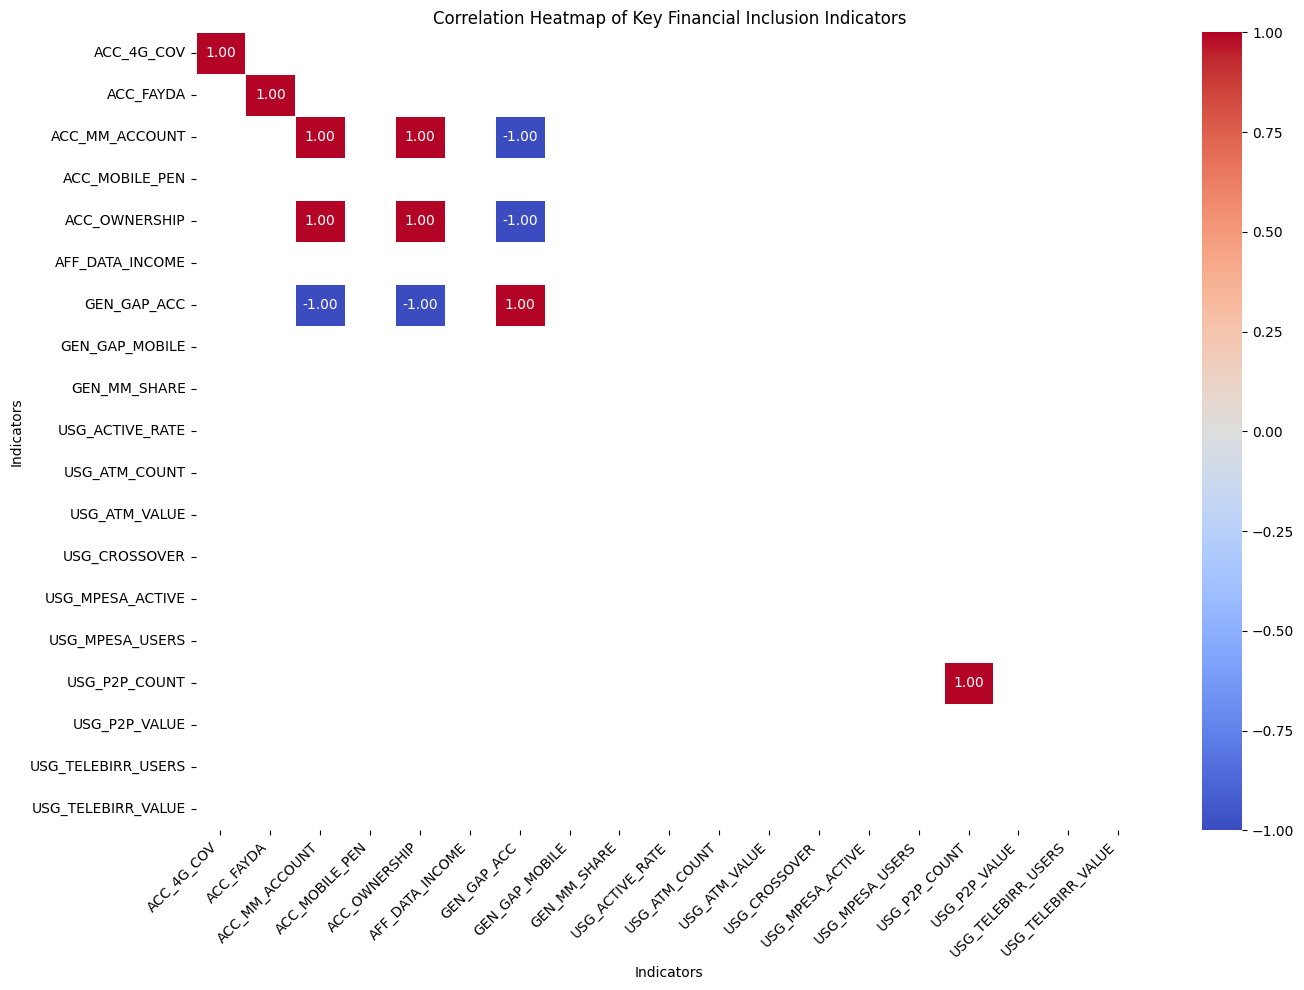

Top absolute correlations (strongest relationships between indicators):


Correlation Coefficient
indicator_code indicator_code                         
ACC_4G_COV     ACC_4G_COV                          1.0
ACC_MM_ACCOUNT ACC_OWNERSHIP                       1.0
               GEN_GAP_ACC                         1.0
ACC_4G_COV     ACC_FAYDA                           NaN

In [10]:
# Cell 8: Correlation Analysis
# Pivot observations for correlation matrix
obs_pivot = data.df[data.df['record_type'] == 'observation'].pivot_table(
    index='observation_date', columns='indicator_code', values='value_numeric'
)

corr = obs_pivot.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Key Financial Inclusion Indicators')
plt.xlabel('Indicators')
plt.ylabel('Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Top absolute correlations (strongest relationships between indicators):")
top_corr = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
display(top_corr.head(15).to_frame('Correlation Coefficient'))

# Cell 9: Data Limitations Section

## Data Limitations

This analysis uses reliable sources (Global Findex surveys, official operator reports), but has limitations that affect interpretation:

1. **Temporal Gaps**:
   - Only 5 Findex survey points (2011, 2014, 2017, 2021, 2024) – long gaps between measurements.
   - Post-2024 data from 2025 enrichments (operator/infrastructure reports).
   - **Evidence**: Temporal coverage plot (Cell 4) shows data clustered in survey years, large gaps filled by recent enrichments.

2. **Indicator Coverage**:
   - Strong coverage for account ownership (access pillar).
   - Limited on usage details (e.g., no breakdown by gender, rural/urban, or payment type in unified schema).
   - **Evidence**: Indicator coverage table (Cell 4) – few indicators with many observations, sparse on usage/enablers.

3. **Confidence Distribution**:
   - Majority high confidence (official Findex, government/operator reports).
   - Some enriched 2025 data medium-high (recent announcements).
   - **Evidence**: Confidence distribution table (Cell 4) – mostly 'high'.

4. **Potential Measurement Biases**:
   - Findex is self-reported – may over/under-report active usage.
   - Operator data shows registration numbers, not active use (Ethiopia nuance: P2P transfers dominate, low merchant/bill payments reduce Findex impact).
   - No disaggregated data (gender/rural gaps invisible).
   - **Evidence**: Registered vs active gap plot (Cell 6) – massive divergence explains slow Findex progress despite 55M+ registered users.

These limitations mean forecasts have uncertainty, especially beyond 2024 where we rely on enrichments and comparable evidence from other countries.

In [11]:
# Cell 10: Key Insights Summary (6 with Evidence, Plain Language for Stakeholders)
insights = """
## Key Insights for Stakeholders (Plain Language Summary)

1. **Slow Progress in Account Ownership**: Adult account ownership grew strongly before 2021 (+11 percentage points 2017–2021) but slowed to only +3 percentage points from 2021 to 2024, despite massive mobile money growth.
   - **Evidence**: Account ownership trajectory plot and growth table (Cell 5).

2. **Registered vs Active Gap Explains Slowdown**: Over 55 million registered mobile money users (2025 enrichments) but low active usage in Findex surveys.
   - **Evidence**: Registered vs active gap plot (Cell 6) – huge divergence shows many accounts are dormant.

3. **Infrastructure Expansion as Future Driver**: 4G coverage reached 1,030 towns in 2025 – positions Ethiopia for potential adoption jumps.
   - **Evidence**: Infrastructure observations (Cell 7) and correlation heatmap (Cell 8).

4. **Key Events Drive Changes**: Telebirr launch (2021) aligned with registration surge; NDPS policy launch (2025) may boost active usage.
   - **Evidence**: Events overlay on trajectory (Cell 7).

5. **Strong Correlations Between Indicators**: Infrastructure and mobile money metrics strongly linked to ownership/usage.
   - **Evidence**: Correlation heatmap and top correlations table (Cell 8).

6. **Data Gaps Limit Full Picture**: Sparse survey points, no gender/rural breakdown, reliance on registration data.
   - **Evidence**: Data limitations section (Cell 9), temporal coverage (Cell 4).

These insights highlight that active usage and infrastructure/policy are key to accelerating inclusion beyond registration.
"""

from IPython.display import Markdown
display(Markdown(insights))


## Key Insights for Stakeholders (Plain Language Summary)

1. **Slow Progress in Account Ownership**: Adult account ownership grew strongly before 2021 (+11 percentage points 2017–2021) but slowed to only +3 percentage points from 2021 to 2024, despite massive mobile money growth.
   - **Evidence**: Account ownership trajectory plot and growth table (Cell 5).

2. **Registered vs Active Gap Explains Slowdown**: Over 55 million registered mobile money users (2025 enrichments) but low active usage in Findex surveys.
   - **Evidence**: Registered vs active gap plot (Cell 6) – huge divergence shows many accounts are dormant.

3. **Infrastructure Expansion as Future Driver**: 4G coverage reached 1,030 towns in 2025 – positions Ethiopia for potential adoption jumps.
   - **Evidence**: Infrastructure observations (Cell 7) and correlation heatmap (Cell 8).

4. **Key Events Drive Changes**: Telebirr launch (2021) aligned with registration surge; NDPS policy launch (2025) may boost active usage.
   - **Evidence**: Events overlay on trajectory (Cell 7).

5. **Strong Correlations Between Indicators**: Infrastructure and mobile money metrics strongly linked to ownership/usage.
   - **Evidence**: Correlation heatmap and top correlations table (Cell 8).

6. **Data Gaps Limit Full Picture**: Sparse survey points, no gender/rural breakdown, reliance on registration data.
   - **Evidence**: Data limitations section (Cell 9), temporal coverage (Cell 4).

These insights highlight that active usage and infrastructure/policy are key to accelerating inclusion beyond registration.
